# Matplotlib basics

<a href="http://matplotlib.org/">Matplotlib</a> has become the de facto standard for scientific 2D plotting in Python. It originally attempted to provide a style of interaction similar to Matlab. It allows you to save graphics to different raster and vector image formats, including PDF, JPG, SVG, PNG, BMP and GIF. 

Plots and visualizations are one of the most important tasks in data analysis. Having an understanding of the basics of matplotlib is thus an essential aspect of data science in Python.

## Plotting and attributes...

Using matplotlib requires typically importing the <code>pyplot</code> object. There is also the option of starting IPython in "pylab" mode, but we will not cover it here. You can plot ** in a single cell** by simply using that object. There are different ways of changing the properties of lines...

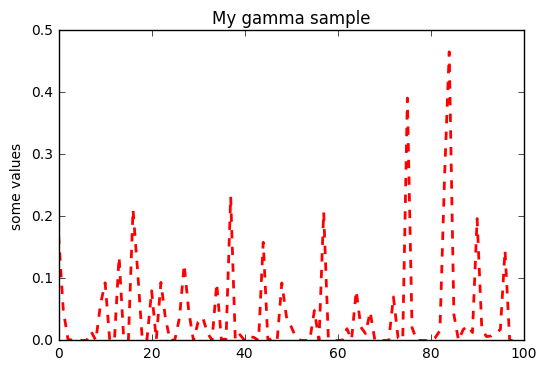

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get some random points from a gamma dist. 
L = np.random.gamma(0.2, 0.2, 100)

# Tell IPython to use the internal GUI (there are other options, but require correct install of external software)
%matplotlib inline

# Plot and change the line using a format string:
#line, = plt.plot(L, "--")  # Note the comma!

# This is the same as:
line, = plt.plot(L, linestyle="--") # line, lo deja como un valor y no una lista

# Method 2: Use setp and pass the object:
plt.setp(line, color="r")

# Method 3: Call directly the set_XX on the object:
line.set_linewidth(2.0)

# Change figure-related properties:
plt.title("My gamma sample")
plt.ylabel("some values")


<type 'list'>


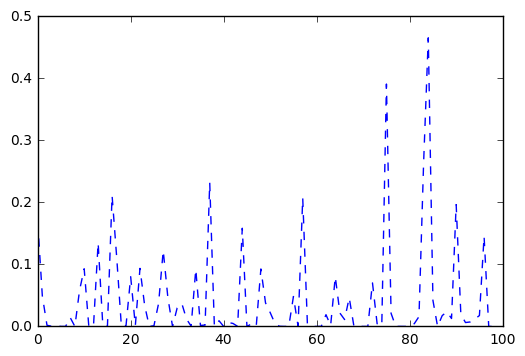

In [8]:
# Note that pyplot returns a list of lines added:
line = plt.plot(L, linestyle="--")
print type(line)

The complete documentation of format strings is in the docs of the <code>pyplot</code> object: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

You can get the available properties for an object using:

In [9]:
plt.setp(line)

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  antialiased or aa: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: string or anything printable with '%s' conversion. 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash

## What if you want to do something else with the plot above?

You can change plot properties overall and of the different parts of the plot if you are in the same Notebook cell as many times you want. This means the state of the plot is maintained in the same cell.

But by default, IPython closes the previous plot, so it is no longer accessible, a new one is created. This is to avoid interference between cells.

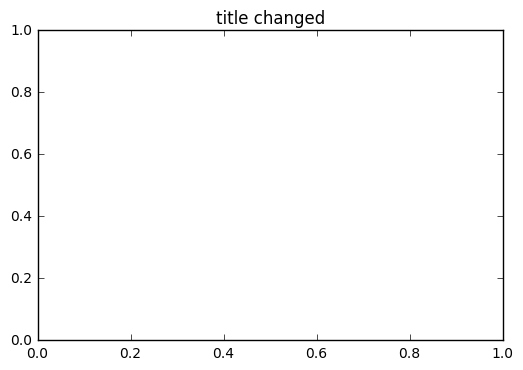

In [10]:
plt.title("title changed")
plt.show()

However, you can enable the configuration of IPython so that it does not close previous plots. This can be achieved with a configuration option. 

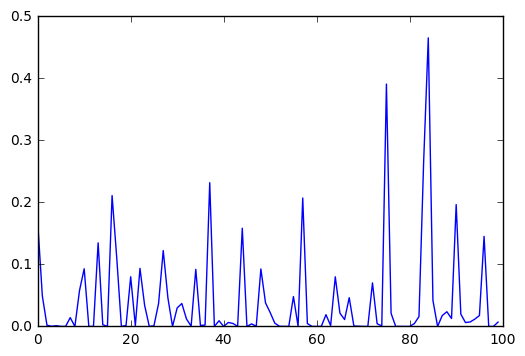

In [11]:
from IPython.core.display import set_matplotlib_close

set_matplotlib_close(False)
# Now we plot again.

# Clear the figures before:
plt.clf()
plt.plot(L)
plt.show()

And now we change the plot, and it changes the previous one.

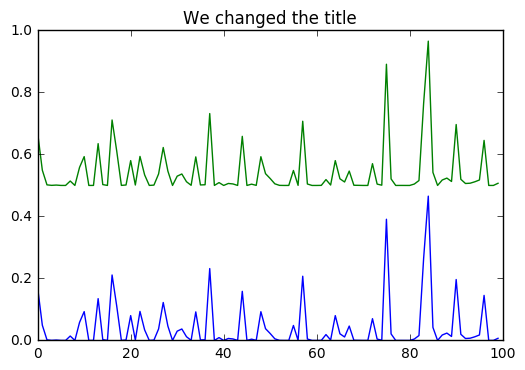

In [12]:
plt.title("We changed the title")
plt.plot([i+0.5 for i in L])
# There can be several lines in the same plot:
plt.show()

Now let's revert to the normal behaviour.

In [13]:
set_matplotlib_close(True)
plt.clf()

## Several figures, same plot

You can plot several lines with the same plot sentence.

3


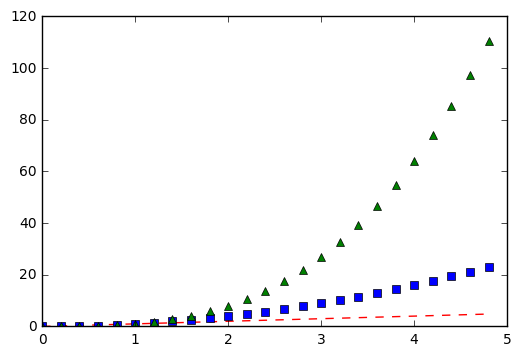

In [14]:
%matplotlib inline
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
lines = plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

print len(lines)

If you use arguments, they apply to all the lines:

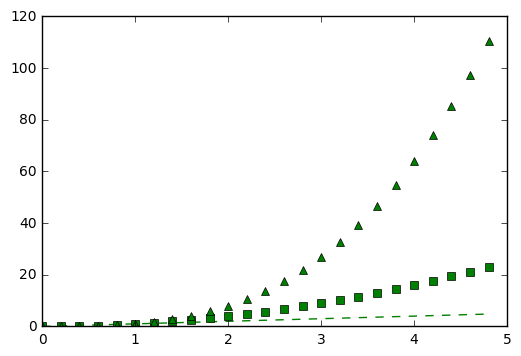

In [15]:
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^', color="g")

## Saving plots

You can easily save a plot.

 El volumen de la unidad C es Windows8_OS
 El n£mero de serie del volumen es: A699-69CC

 Directorio de C:\Users\CarlosEduardo\CiffBigData\DataSciencePython\bloque4_plotting



No se encuentra el archivo


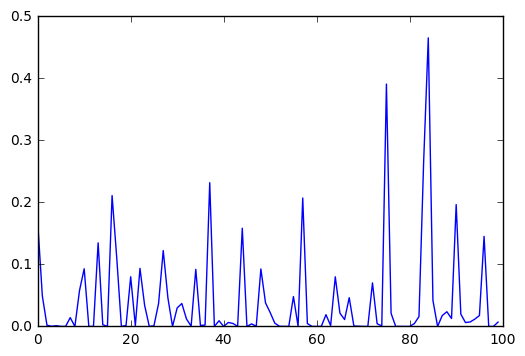

In [16]:
plt.plot(L)
plt.savefig("gamma.pdf", format="pdf")  # Try some arguments as dpi and bbox_inches...
%ls -la

## Working with subplots

Using the <code>subplot</code> function, you can have several subplots in the same figure.

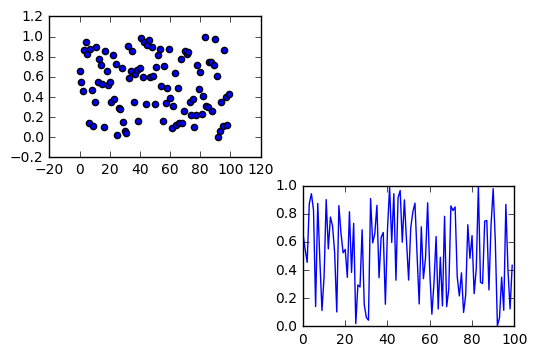

In [17]:
plt.figure(1)  # Creates a figure, this is done by default, you can omit it.
plt.subplot(224) # 2 rows, 2 columns, select the last one.

# Create some data and plot it:
data = np.random.random(100)
x = range(len(data))
plt.plot(x, data)

# Now select other subplot:
plt.subplot(221)
plt.scatter(x, data)


## Adding text

You can add text to a plot by using the text function. $\mu $

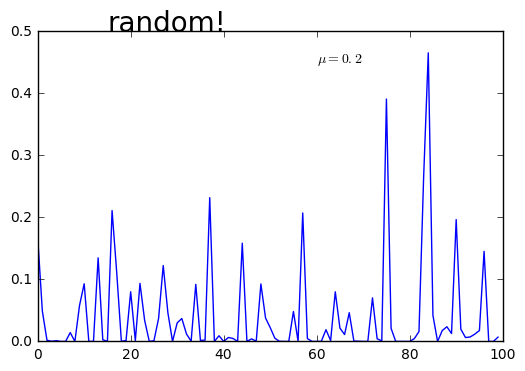

In [25]:
plt.plot(L)
t = plt.text(15, 0.5, "random!") # Note how the coords are provided.
t.set_fontsize(20)
t2 = plt.text(60, 0.45, r"$\mu=0.2$") #utiliza la escala de los ejes

**Annotations** are text with some kind of arrow...

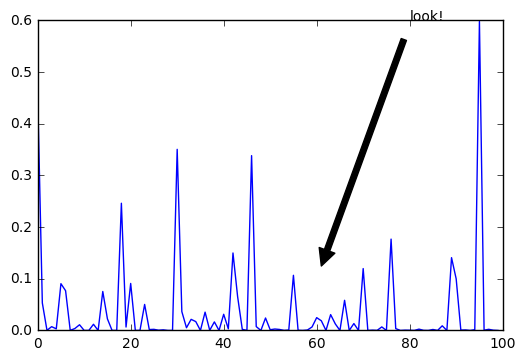

In [16]:
plt.plot(L)
t = plt.annotate('look!', xy=(60, 0.1), xytext=(80, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.05),
            ) # me crea una flecha dentro del grafico

## Plotting multi-dimensional data

If you pass a multidimensional structure, it plots the columns. 

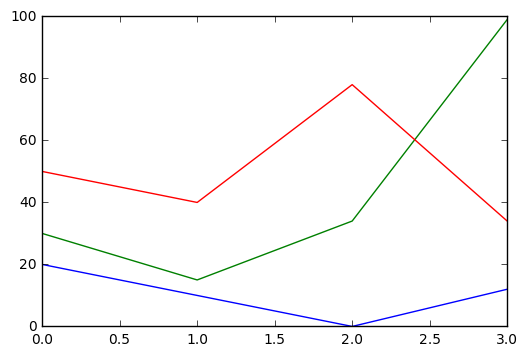

In [17]:
M = [[20, 30, 50],
     [10, 15, 40],
     [ 0, 34, 78],
     [12, 99, 34]]
plt.plot(M)

You can plot a single row or column.

<Container object of 3 artists>

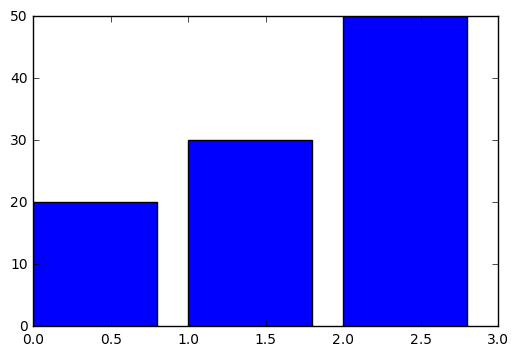

In [18]:
plt.bar(range(len(M[0])), M[0])

## Plot goodies, the example of scatter

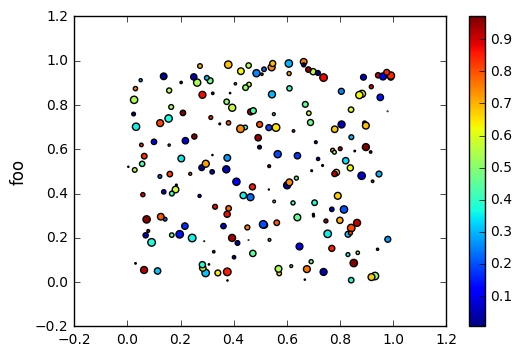

In [19]:

x = np.random.rand(200)
y = np.random.rand(200)
size = np.random.rand(200)*30
color = np.random.rand(200)
plt.scatter(x, y, size, color)
plt.colorbar()
plt.ylabel("foo", fontsize="large")

## Plotting with Pandas

You can pass **Series** objects to pyplot, but it is more interesting to use DataFrames.

In [20]:
# Create a time series
import pandas as pd
dates = pd.date_range('20130101',periods=10)
print dates
visits = pd.DataFrame(np.random.randint(20, 300, 20).reshape(10,2), 
                      index=dates, 
                      columns = ["group A", "group B"])
visits

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10'],
              dtype='datetime64[ns]', freq='D')


,group A,group B
2013-01-01,227,118
2013-01-02,144,80
2013-01-03,188,158
2013-01-04,272,86
2013-01-05,164,275
2013-01-06,130,195
2013-01-07,248,178
2013-01-08,254,161
2013-01-09,112,78
2013-01-10,224,121


Pandas DataFrame has a <code>plot</code> operation that integrates matplotlib with a number of parameters.

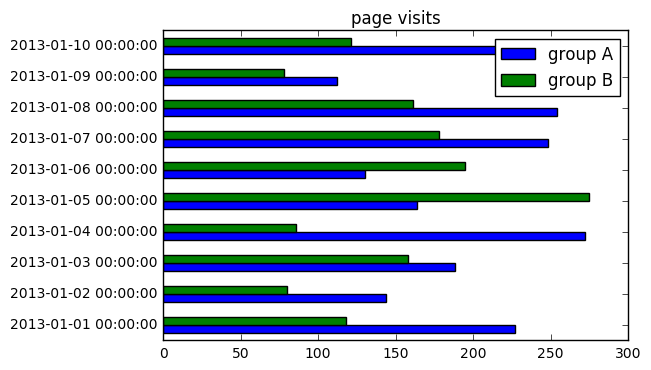

In [21]:
visits.plot(kind="barh", title="page visits")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116ba1d50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116c5bad0>], dtype=object)

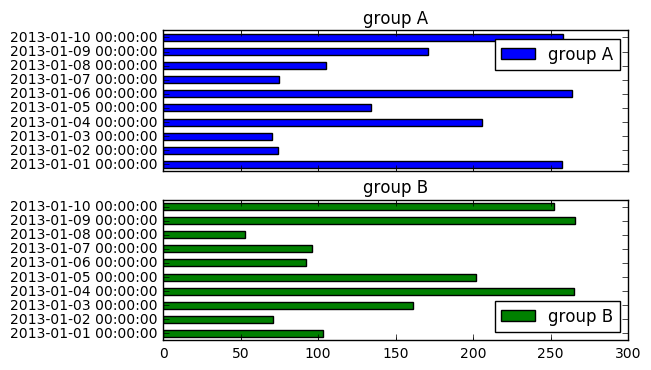

In [19]:
visits.plot(kind="barh", subplots=True)

## Looking for more

Just go to the gallery and look at the code of examples: http://matplotlib.org/gallery.html 

## Inside Matplotlib objects

Instead of having a single plot, it is often convenient to have several and manipulate them explicitly. You can create several plots using the <code>figure</code> function.

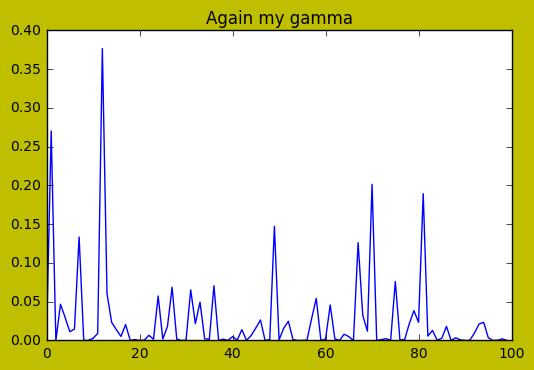

In [20]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # one row, one column, select the first (and unique)
ax.plot(L)
ax.set_title("Again my gamma")

# You can change also Figure properties:
fig.set_facecolor("y")

<class 'matplotlib.axes._subplots.AxesSubplot'>


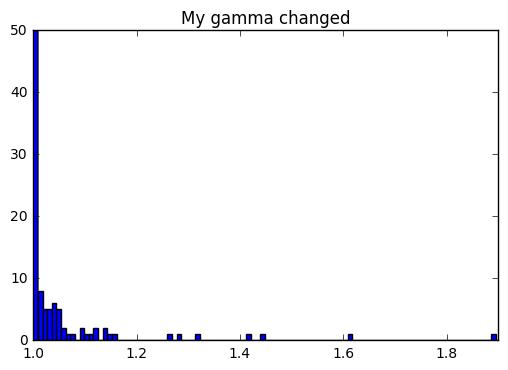

In [21]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1) # one row, one column, select the first (and unique)
print type(ax2)
ax2.hist([(i+1)**2 for i in L], bins=100)
ax2.set_title("My gamma changed")

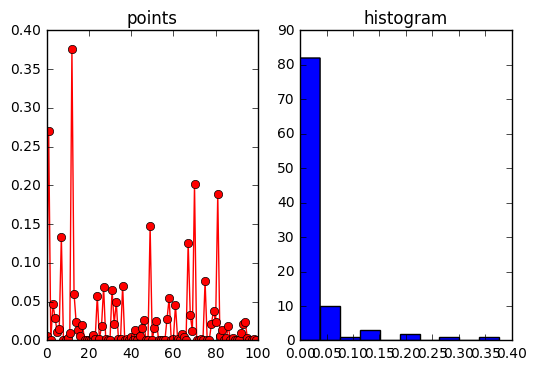

In [22]:
fig3 = plt.figure()

points = fig3.add_subplot(1,2,1) # one row, one column, select the first
points.plot(L)
points.set_title("points")

# Two ways of setting properties:
points.lines[0].set_marker('o')
plt.setp(points.lines[0], color="r")

histogram = fig3.add_subplot(1,2,2) # one row, one column, select the second
histogram.hist(L)
histogram.set_title("histogram")

We can change any property for example of a function using setp or set_XX functions, as seen above. 